# Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras import losses
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [3]:
data = pd.read_csv('PETR4.SA.csv')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-06,26.549999,26.760000,26.469999,26.760000,26.760000,18423400
1,2019-03-07,26.799999,26.910000,26.490000,26.770000,26.770000,32835300
2,2019-03-08,26.490000,26.750000,26.219999,26.670000,26.670000,49564400
3,2019-03-11,27.020000,27.780001,27.010000,27.750000,27.750000,66742800
4,2019-03-12,27.790001,27.959999,27.250000,27.500000,27.500000,64287300
5,2019-03-13,27.590000,28.129999,27.520000,28.100000,28.100000,61057200
6,2019-03-14,28.150000,28.200001,27.910000,28.190001,28.190001,42777800
7,2019-03-15,28.160000,28.389999,28.110001,28.250000,28.250000,61041100
8,2019-03-18,28.350000,28.790001,28.260000,28.740000,28.740000,91920600
9,2019-03-19,28.850000,29.500000,28.600000,29.200001,29.200001,69423600


In [4]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('PETR4.SA.csv', parse_dates=['Date'], date_parser=dateparse)

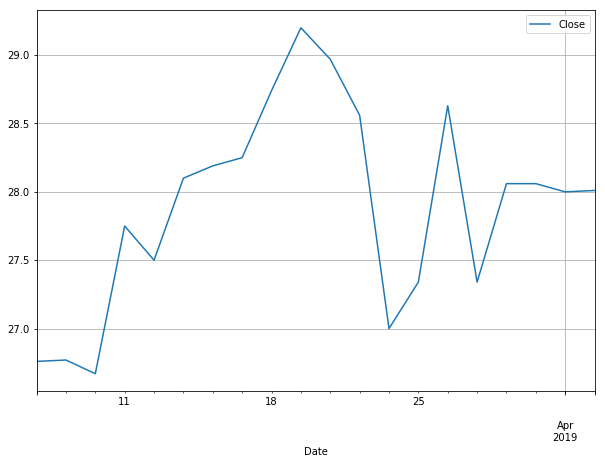

In [5]:
data.plot(x='Date', y='Close', figsize=(10, 7))
plt.grid(True)

# Preprocessing

In [6]:
def data_norm(data):
    mini = min(data)
    maxi = max(data)
    return (data-mini)/(maxi-mini)

In [7]:
data_frame = pd.DataFrame()

In [8]:
data_frame['Date'] = data.Date
data_frame['Close'] = data.Close

In [9]:
data_frame.head(10)

,Date,Close
0,2019-03-06,26.760000
1,2019-03-07,26.770000
2,2019-03-08,26.670000
3,2019-03-11,27.750000
4,2019-03-12,27.500000
5,2019-03-13,28.100000
6,2019-03-14,28.190001
7,2019-03-15,28.250000
8,2019-03-18,28.740000
9,2019-03-19,29.200001


In [10]:
data_frame = data_norm(data_frame['Close'])
data_frame = data_frame + 1

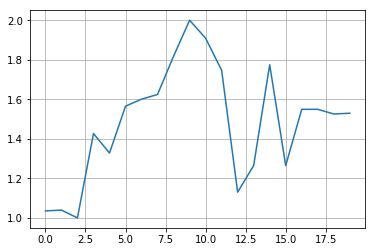

In [11]:
plt.plot(data_frame)
plt.grid(True)

# Organizing data

In [12]:
def organize_date(sequence, n_steps):
    X, y = list(), list()
    
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if (end_ix > len(sequence)-1): break
        
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
       
    return np.array(X), np.array(y)

In [13]:
def split_data(X, y, train_size):
    x_train = X[:int(len(X)*train_size)]
    x_test = X[int(len(X)*train_size):]
    y_train = y[:int(len(y)*train_size)]
    y_test = y[int(len(y)*train_size):]
    return x_train, x_test, y_train, y_test

In [14]:
def MAPE(y_test, prediction):
    soma = 0
    for i in range(len(y_test)):
        soma += abs((y_test[i] - prediction[i]) / y_test[i]) * 100
    media_erro = soma / len(y_test)
    return media_erro.round(5)

In [15]:
step = 2

In [18]:
X, y = organize_date(data_frame, step)

In [19]:
X_train, X_test, y_train, y_test = split_data(X, y, train_size=0.25)

# Training MLP

In [20]:
def network_model():
    model = Sequential()
    
    model.add(Dense(30, input_dim=step, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
    return model

In [21]:
errors = []

In [83]:
for i in range(1, 11):
    mlp_regressor = KerasRegressor(build_fn=network_model, epochs=100, batch_size=10)
    model = mlp_regressor.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=False)
    pred = mlp_regressor.predict(X_test)
    mape = MAPE(y_test, pred)
    errors.append(mape)

Train on 4 samples, validate on 14 samples
Epoch 1/100
4/4 [==============================] - 1s 157ms/step - loss: 1.8723 - acc: 0.0000e+00 - val_loss: 2.6585 - val_acc: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1.8430 - acc: 0.0000e+00 - val_loss: 2.6003 - val_acc: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 1.8039 - acc: 0.0000e+00 - val_loss: 2.5427 - val_acc: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7650 - acc: 0.0000e+00 - val_loss: 2.4856 - val_acc: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7264 - acc: 0.0000e+00 - val_loss: 2.4291 - val_acc: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 810us/step - loss: 1.6882 - acc: 0.0000e+00 - val_loss: 2.3731 - val_acc: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 1.6504 - acc: 0.0000e+00 - val_loss: 2.3176 - val_acc: 0.000

Epoch 61/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3861 - acc: 0.2500 - val_loss: 0.4879 - val_acc: 0.0000e+00
Epoch 62/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3725 - acc: 0.2500 - val_loss: 0.4695 - val_acc: 0.0000e+00
Epoch 63/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3591 - acc: 0.2500 - val_loss: 0.4516 - val_acc: 0.0000e+00
Epoch 64/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3460 - acc: 0.2500 - val_loss: 0.4340 - val_acc: 0.0000e+00
Epoch 65/100
4/4 [==============================] - 0s 977us/step - loss: 0.3332 - acc: 0.2500 - val_loss: 0.4169 - val_acc: 0.0000e+00
Epoch 66/100
4/4 [==============================] - 0s 985us/step - loss: 0.3206 - acc: 0.2500 - val_loss: 0.4002 - val_acc: 0.0000e+00
Epoch 67/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3084 - acc: 0.2500 - val_loss: 0.3840 - val_acc: 0.0000e+00
Epoch 68/100
4/4 [==============================] - 0s 2ms

Epoch 22/100
4/4 [==============================] - 0s 1ms/step - loss: 1.2168 - acc: 0.0000e+00 - val_loss: 1.6757 - val_acc: 0.0000e+00
Epoch 23/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1944 - acc: 0.0000e+00 - val_loss: 1.6431 - val_acc: 0.0000e+00
Epoch 24/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1726 - acc: 0.0000e+00 - val_loss: 1.6110 - val_acc: 0.0000e+00
Epoch 25/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1511 - acc: 0.0000e+00 - val_loss: 1.5796 - val_acc: 0.0000e+00
Epoch 26/100
4/4 [==============================] - 0s 923us/step - loss: 1.1304 - acc: 0.0000e+00 - val_loss: 1.5491 - val_acc: 0.0000e+00
Epoch 27/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1101 - acc: 0.0000e+00 - val_loss: 1.5192 - val_acc: 0.0000e+00
Epoch 28/100
4/4 [==============================] - 0s 981us/step - loss: 1.0903 - acc: 0.0000e+00 - val_loss: 1.4899 - val_acc: 0.0000e+00
Epoch 29/100
4/4 [============

Epoch 82/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3321 - acc: 0.2500 - val_loss: 0.4193 - val_acc: 0.0000e+00
Epoch 83/100
4/4 [==============================] - 0s 973us/step - loss: 0.3223 - acc: 0.2500 - val_loss: 0.4063 - val_acc: 0.0000e+00
Epoch 84/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3127 - acc: 0.2500 - val_loss: 0.3936 - val_acc: 0.0000e+00
Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3033 - acc: 0.2500 - val_loss: 0.3812 - val_acc: 0.0000e+00
Epoch 86/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2941 - acc: 0.2500 - val_loss: 0.3691 - val_acc: 0.0000e+00
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2851 - acc: 0.2500 - val_loss: 0.3572 - val_acc: 0.0000e+00
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2763 - acc: 0.2500 - val_loss: 0.3456 - val_acc: 0.0000e+00
Epoch 89/100
4/4 [==============================] - 0s 2ms/s

Epoch 42/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6313 - acc: 0.2500 - val_loss: 0.8147 - val_acc: 0.0000e+00
Epoch 43/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6145 - acc: 0.2500 - val_loss: 0.7913 - val_acc: 0.0000e+00
Epoch 44/100
4/4 [==============================] - 0s 917us/step - loss: 0.5978 - acc: 0.2500 - val_loss: 0.7683 - val_acc: 0.0000e+00
Epoch 45/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5814 - acc: 0.2500 - val_loss: 0.7456 - val_acc: 0.0000e+00
Epoch 46/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5652 - acc: 0.2500 - val_loss: 0.7232 - val_acc: 0.0000e+00
Epoch 47/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5491 - acc: 0.2500 - val_loss: 0.7011 - val_acc: 0.0000e+00
Epoch 48/100
4/4 [==============================] - 0s 954us/step - loss: 0.5333 - acc: 0.2500 - val_loss: 0.6793 - val_acc: 0.0000e+00
Epoch 49/100
4/4 [==============================] - 0s 1ms

Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 2.0808 - acc: 0.0000e+00 - val_loss: 2.9523 - val_acc: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 991us/step - loss: 2.0332 - acc: 0.0000e+00 - val_loss: 2.8822 - val_acc: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.9875 - acc: 0.0000e+00 - val_loss: 2.8150 - val_acc: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.9426 - acc: 0.0000e+00 - val_loss: 2.7499 - val_acc: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.8996 - acc: 0.0000e+00 - val_loss: 2.6875 - val_acc: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.8576 - acc: 0.0000e+00 - val_loss: 2.6269 - val_acc: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.8165 - acc: 0.0000e+00 - val_loss: 2.5679 - val_acc: 0.0000e+00
Epoch 10/100
4/4 [=====================

Epoch 63/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6005 - acc: 0.2500 - val_loss: 0.8049 - val_acc: 0.0000e+00
Epoch 64/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5861 - acc: 0.2500 - val_loss: 0.7844 - val_acc: 0.0000e+00
Epoch 65/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5720 - acc: 0.2500 - val_loss: 0.7642 - val_acc: 0.0000e+00
Epoch 66/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5581 - acc: 0.2500 - val_loss: 0.7442 - val_acc: 0.0000e+00
Epoch 67/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5444 - acc: 0.2500 - val_loss: 0.7246 - val_acc: 0.0000e+00
Epoch 68/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5309 - acc: 0.2500 - val_loss: 0.7054 - val_acc: 0.0000e+00
Epoch 69/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5177 - acc: 0.2500 - val_loss: 0.6864 - val_acc: 0.0000e+00
Epoch 70/100
4/4 [==============================] - 0s 1ms/ste

Epoch 24/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0370 - acc: 0.0000e+00 - val_loss: 1.4006 - val_acc: 0.0000e+00
Epoch 25/100
4/4 [==============================] - 0s 927us/step - loss: 1.0150 - acc: 0.0000e+00 - val_loss: 1.3685 - val_acc: 0.0000e+00
Epoch 26/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9931 - acc: 0.0000e+00 - val_loss: 1.3375 - val_acc: 0.0000e+00
Epoch 27/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9721 - acc: 0.0000e+00 - val_loss: 1.3071 - val_acc: 0.0000e+00
Epoch 28/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9514 - acc: 0.0000e+00 - val_loss: 1.2771 - val_acc: 0.0000e+00
Epoch 29/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9311 - acc: 0.0000e+00 - val_loss: 1.2476 - val_acc: 0.0000e+00
Epoch 30/100
4/4 [==============================] - 0s 879us/step - loss: 0.9110 - acc: 0.0000e+00 - val_loss: 1.2183 - val_acc: 0.0000e+00
Epoch 31/100
4/4 [============

Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1687 - acc: 0.2500 - val_loss: 0.2041 - val_acc: 0.0000e+00
Epoch 86/100
4/4 [==============================] - 0s 1ms/step - loss: 0.1617 - acc: 0.2500 - val_loss: 0.1956 - val_acc: 0.0000e+00
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1549 - acc: 0.2500 - val_loss: 0.1875 - val_acc: 0.0000e+00
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1484 - acc: 0.2500 - val_loss: 0.1797 - val_acc: 0.0000e+00
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1421 - acc: 0.2500 - val_loss: 0.1722 - val_acc: 0.0000e+00
Epoch 90/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1360 - acc: 0.2500 - val_loss: 0.1651 - val_acc: 0.0000e+00
Epoch 91/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1302 - acc: 0.2500 - val_loss: 0.1583 - val_acc: 0.0000e+00
Epoch 92/100
4/4 [==============================] - 0s 2ms/ste

Epoch 45/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9154 - acc: 0.0000e+00 - val_loss: 1.2487 - val_acc: 0.0000e+00
Epoch 46/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8997 - acc: 0.0000e+00 - val_loss: 1.2259 - val_acc: 0.0000e+00
Epoch 47/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8840 - acc: 0.0000e+00 - val_loss: 1.2034 - val_acc: 0.0000e+00
Epoch 48/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8685 - acc: 0.0000e+00 - val_loss: 1.1809 - val_acc: 0.0000e+00
Epoch 49/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8529 - acc: 0.0000e+00 - val_loss: 1.1587 - val_acc: 0.0000e+00
Epoch 50/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8376 - acc: 0.0000e+00 - val_loss: 1.1367 - val_acc: 0.0000e+00
Epoch 51/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8224 - acc: 0.0000e+00 - val_loss: 1.1149 - val_acc: 0.0000e+00
Epoch 52/100
4/4 [================

Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 1.5029 - acc: 0.0000e+00 - val_loss: 2.0735 - val_acc: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.4717 - acc: 0.0000e+00 - val_loss: 2.0280 - val_acc: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.4413 - acc: 0.0000e+00 - val_loss: 1.9844 - val_acc: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 1.4120 - acc: 0.0000e+00 - val_loss: 1.9424 - val_acc: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3837 - acc: 0.0000e+00 - val_loss: 1.9012 - val_acc: 0.0000e+00
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 1.3558 - acc: 0.0000e+00 - val_loss: 1.8604 - val_acc: 0.0000e+00
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 1.3287 - acc: 0.0000e+00 - val_loss: 1.8205 - val_acc: 0.0000e+00
Epoch 13/100
4/4 [====================

Epoch 66/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3250 - acc: 0.2500 - val_loss: 0.4027 - val_acc: 0.0000e+00
Epoch 67/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3141 - acc: 0.2500 - val_loss: 0.3884 - val_acc: 0.0000e+00
Epoch 68/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3035 - acc: 0.2500 - val_loss: 0.3744 - val_acc: 0.0000e+00
Epoch 69/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2930 - acc: 0.2500 - val_loss: 0.3607 - val_acc: 0.0000e+00
Epoch 70/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2828 - acc: 0.2500 - val_loss: 0.3475 - val_acc: 0.0000e+00
Epoch 71/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2729 - acc: 0.2500 - val_loss: 0.3347 - val_acc: 0.0000e+00
Epoch 72/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2632 - acc: 0.2500 - val_loss: 0.3222 - val_acc: 0.0000e+00
Epoch 73/100
4/4 [==============================] - 0s 1ms/ste

Epoch 27/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1516 - acc: 0.0000e+00 - val_loss: 1.5856 - val_acc: 0.0000e+00
Epoch 28/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1303 - acc: 0.0000e+00 - val_loss: 1.5549 - val_acc: 0.0000e+00
Epoch 29/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1093 - acc: 0.0000e+00 - val_loss: 1.5244 - val_acc: 0.0000e+00
Epoch 30/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0884 - acc: 0.0000e+00 - val_loss: 1.4942 - val_acc: 0.0000e+00
Epoch 31/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0677 - acc: 0.0000e+00 - val_loss: 1.4643 - val_acc: 0.0000e+00
Epoch 32/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0472 - acc: 0.0000e+00 - val_loss: 1.4347 - val_acc: 0.0000e+00
Epoch 33/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0269 - acc: 0.0000e+00 - val_loss: 1.4053 - val_acc: 0.0000e+00
Epoch 34/100
4/4 [================

Epoch 88/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2699 - acc: 0.2500 - val_loss: 0.3336 - val_acc: 0.0000e+00
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2615 - acc: 0.2500 - val_loss: 0.3227 - val_acc: 0.0000e+00
Epoch 90/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2533 - acc: 0.2500 - val_loss: 0.3120 - val_acc: 0.0000e+00
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2453 - acc: 0.2500 - val_loss: 0.3016 - val_acc: 0.0000e+00
Epoch 92/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2374 - acc: 0.2500 - val_loss: 0.2915 - val_acc: 0.0000e+00
Epoch 93/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2298 - acc: 0.2500 - val_loss: 0.2817 - val_acc: 0.0000e+00
Epoch 94/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2223 - acc: 0.2500 - val_loss: 0.2721 - val_acc: 0.0000e+00
Epoch 95/100
4/4 [==============================] - 0s 2ms/ste

Epoch 48/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7514 - acc: 0.0000e+00 - val_loss: 1.0020 - val_acc: 0.0000e+00
Epoch 49/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7352 - acc: 0.0000e+00 - val_loss: 0.9792 - val_acc: 0.0000e+00
Epoch 50/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7191 - acc: 0.0000e+00 - val_loss: 0.9565 - val_acc: 0.0000e+00
Epoch 51/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7031 - acc: 0.0000e+00 - val_loss: 0.9340 - val_acc: 0.0000e+00
Epoch 52/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6873 - acc: 0.0000e+00 - val_loss: 0.9117 - val_acc: 0.0000e+00
Epoch 53/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6716 - acc: 0.0000e+00 - val_loss: 0.8896 - val_acc: 0.0000e+00
Epoch 54/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6560 - acc: 0.2500 - val_loss: 0.8678 - val_acc: 0.0000e+00
Epoch 55/100
4/4 [====================

Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7614 - acc: 0.0000e+00 - val_loss: 2.5022 - val_acc: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7365 - acc: 0.0000e+00 - val_loss: 2.4656 - val_acc: 0.0000e+00
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7119 - acc: 0.0000e+00 - val_loss: 2.4295 - val_acc: 0.0000e+00
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.6875 - acc: 0.0000e+00 - val_loss: 2.3938 - val_acc: 0.0000e+00
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 1.6633 - acc: 0.0000e+00 - val_loss: 2.3585 - val_acc: 0.0000e+00
Epoch 14/100
4/4 [==============================] - 0s 2ms/step - loss: 1.6393 - acc: 0.0000e+00 - val_loss: 2.3234 - val_acc: 0.0000e+00
Epoch 15/100
4/4 [==============================] - 0s 1ms/step - loss: 1.6155 - acc: 0.0000e+00 - val_loss: 2.2887 - val_acc: 0.0000e+00
Epoch 16/100
4/4 [=================

Epoch 69/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7329 - acc: 0.0000e+00 - val_loss: 0.9964 - val_acc: 0.0000e+00
Epoch 70/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7203 - acc: 0.0000e+00 - val_loss: 0.9785 - val_acc: 0.0000e+00
Epoch 71/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7078 - acc: 0.0000e+00 - val_loss: 0.9607 - val_acc: 0.0000e+00
Epoch 72/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6953 - acc: 0.0000e+00 - val_loss: 0.9431 - val_acc: 0.0000e+00
Epoch 73/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6830 - acc: 0.0000e+00 - val_loss: 0.9256 - val_acc: 0.0000e+00
Epoch 74/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6707 - acc: 0.0000e+00 - val_loss: 0.9082 - val_acc: 0.0000e+00
Epoch 75/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6585 - acc: 0.2500 - val_loss: 0.8909 - val_acc: 0.0000e+00
Epoch 76/100
4/4 [====================

In [84]:
print(np.mean(errors))

24.154767


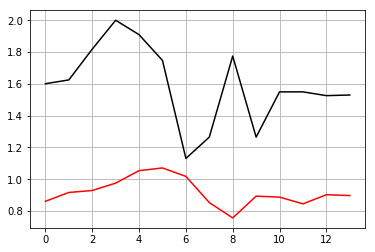

In [85]:
plt.plot(y_test, 'k')
plt.plot(pred, 'r')
plt.grid(True)

In [27]:
for i in range(1, 11):
    mlp_regressor = KerasRegressor(build_fn=network_model, epochs=150, batch_size=10)
    model = mlp_regressor.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=False)
    pred = mlp_regressor.predict(X_test)
    mape = MAPE(y_test, pred)
    errors.append(mape)

Train on 4 samples, validate on 14 samples
Epoch 1/150
4/4 [==============================] - 1s 205ms/step - loss: 1.7122 - acc: 0.0000e+00 - val_loss: 2.3635 - val_acc: 0.0000e+00
Epoch 2/150
4/4 [==============================] - 0s 1ms/step - loss: 1.6678 - acc: 0.0000e+00 - val_loss: 2.3028 - val_acc: 0.0000e+00
Epoch 3/150
4/4 [==============================] - 0s 967us/step - loss: 1.6259 - acc: 0.0000e+00 - val_loss: 2.2421 - val_acc: 0.0000e+00
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 1.5850 - acc: 0.0000e+00 - val_loss: 2.1827 - val_acc: 0.0000e+00
Epoch 5/150
4/4 [==============================] - 0s 1ms/step - loss: 1.5456 - acc: 0.0000e+00 - val_loss: 2.1243 - val_acc: 0.0000e+00
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 1.5058 - acc: 0.0000e+00 - val_loss: 2.0669 - val_acc: 0.0000e+00
Epoch 7/150
4/4 [==============================] - 0s 1ms/step - loss: 1.4662 - acc: 0.0000e+00 - val_loss: 2.0103 - val_acc: 0.000

Epoch 61/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1883 - acc: 0.2500 - val_loss: 0.2223 - val_acc: 0.0000e+00
Epoch 62/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1786 - acc: 0.2500 - val_loss: 0.2106 - val_acc: 0.0000e+00
Epoch 63/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1693 - acc: 0.2500 - val_loss: 0.1995 - val_acc: 0.0000e+00
Epoch 64/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1603 - acc: 0.2500 - val_loss: 0.1889 - val_acc: 0.0000e+00
Epoch 65/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1517 - acc: 0.2500 - val_loss: 0.1789 - val_acc: 0.0000e+00
Epoch 66/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1435 - acc: 0.2500 - val_loss: 0.1694 - val_acc: 0.0000e+00
Epoch 67/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1357 - acc: 0.2500 - val_loss: 0.1605 - val_acc: 0.0000e+00
Epoch 68/150
4/4 [==============================] - 0s 840us/s

Epoch 124/150
4/4 [==============================] - 0s 971us/step - loss: 0.0259 - acc: 0.2500 - val_loss: 0.0782 - val_acc: 0.0714
Epoch 125/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0259 - acc: 0.2500 - val_loss: 0.0783 - val_acc: 0.0714
Epoch 126/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0259 - acc: 0.2500 - val_loss: 0.0785 - val_acc: 0.0714
Epoch 127/150
4/4 [==============================] - 0s 886us/step - loss: 0.0259 - acc: 0.2500 - val_loss: 0.0786 - val_acc: 0.0714
Epoch 128/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0259 - acc: 0.2500 - val_loss: 0.0787 - val_acc: 0.0714
Epoch 129/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0259 - acc: 0.2500 - val_loss: 0.0788 - val_acc: 0.0714
Epoch 130/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0259 - acc: 0.2500 - val_loss: 0.0789 - val_acc: 0.0714
Epoch 131/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0259

Epoch 35/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9767 - acc: 0.0000e+00 - val_loss: 1.3358 - val_acc: 0.0000e+00
Epoch 36/150
4/4 [==============================] - 0s 844us/step - loss: 0.9569 - acc: 0.0000e+00 - val_loss: 1.3064 - val_acc: 0.0000e+00
Epoch 37/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9377 - acc: 0.0000e+00 - val_loss: 1.2779 - val_acc: 0.0000e+00
Epoch 38/150
4/4 [==============================] - 0s 940us/step - loss: 0.9186 - acc: 0.0000e+00 - val_loss: 1.2498 - val_acc: 0.0000e+00
Epoch 39/150
4/4 [==============================] - 0s 2ms/step - loss: 0.8996 - acc: 0.0000e+00 - val_loss: 1.2219 - val_acc: 0.0000e+00
Epoch 40/150
4/4 [==============================] - 0s 895us/step - loss: 0.8807 - acc: 0.0000e+00 - val_loss: 1.1946 - val_acc: 0.0000e+00
Epoch 41/150
4/4 [==============================] - 0s 1ms/step - loss: 0.8618 - acc: 0.0000e+00 - val_loss: 1.1676 - val_acc: 0.0000e+00
Epoch 42/150
4/4 [==========

Epoch 96/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1289 - acc: 0.2500 - val_loss: 0.1614 - val_acc: 0.0000e+00
Epoch 97/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1228 - acc: 0.2500 - val_loss: 0.1542 - val_acc: 0.0000e+00
Epoch 98/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1171 - acc: 0.2500 - val_loss: 0.1473 - val_acc: 0.0000e+00
Epoch 99/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1116 - acc: 0.2500 - val_loss: 0.1408 - val_acc: 0.0000e+00
Epoch 100/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1063 - acc: 0.2500 - val_loss: 0.1347 - val_acc: 0.0000e+00
Epoch 101/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1012 - acc: 0.2500 - val_loss: 0.1289 - val_acc: 0.0000e+00
Epoch 102/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0964 - acc: 0.2500 - val_loss: 0.1235 - val_acc: 0.0000e+00
Epoch 103/150
4/4 [==============================] - 0s 1ms

Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.8549 - acc: 0.0000e+00 - val_loss: 2.6305 - val_acc: 0.0000e+00
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 1.8250 - acc: 0.0000e+00 - val_loss: 2.5868 - val_acc: 0.0000e+00
Epoch 10/150
4/4 [==============================] - 0s 1ms/step - loss: 1.7955 - acc: 0.0000e+00 - val_loss: 2.5436 - val_acc: 0.0000e+00
Epoch 11/150
4/4 [==============================] - 0s 1ms/step - loss: 1.7666 - acc: 0.0000e+00 - val_loss: 2.5014 - val_acc: 0.0000e+00
Epoch 12/150
4/4 [==============================] - 0s 1ms/step - loss: 1.7403 - acc: 0.0000e+00 - val_loss: 2.4619 - val_acc: 0.0000e+00
Epoch 13/150
4/4 [==============================] - 0s 1ms/step - loss: 1.7149 - acc: 0.0000e+00 - val_loss: 2.4241 - val_acc: 0.0000e+00
Epoch 14/150
4/4 [==============================] - 0s 1ms/step - loss: 1.6901 - acc: 0.0000e+00 - val_loss: 2.3879 - val_acc: 0.0000e+00
Epoch 15/150
4/4 [==================

Epoch 68/150
4/4 [==============================] - 0s 1ms/step - loss: 0.7385 - acc: 0.0000e+00 - val_loss: 1.0089 - val_acc: 0.0000e+00
Epoch 69/150
4/4 [==============================] - 0s 1ms/step - loss: 0.7241 - acc: 0.0000e+00 - val_loss: 0.9884 - val_acc: 0.0000e+00
Epoch 70/150
4/4 [==============================] - 0s 1ms/step - loss: 0.7099 - acc: 0.0000e+00 - val_loss: 0.9680 - val_acc: 0.0000e+00
Epoch 71/150
4/4 [==============================] - 0s 929us/step - loss: 0.6957 - acc: 0.0000e+00 - val_loss: 0.9478 - val_acc: 0.0000e+00
Epoch 72/150
4/4 [==============================] - 0s 940us/step - loss: 0.6817 - acc: 0.0000e+00 - val_loss: 0.9278 - val_acc: 0.0000e+00
Epoch 73/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6678 - acc: 0.0000e+00 - val_loss: 0.9080 - val_acc: 0.0000e+00
Epoch 74/150
4/4 [==============================] - 0s 1ms/step - loss: 0.6540 - acc: 0.2500 - val_loss: 0.8885 - val_acc: 0.0000e+00
Epoch 75/150
4/4 [================

Epoch 129/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1471 - acc: 0.2500 - val_loss: 0.1890 - val_acc: 0.0000e+00
Epoch 130/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1423 - acc: 0.2500 - val_loss: 0.1831 - val_acc: 0.0000e+00
Epoch 131/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1377 - acc: 0.2500 - val_loss: 0.1774 - val_acc: 0.0000e+00
Epoch 132/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1332 - acc: 0.2500 - val_loss: 0.1719 - val_acc: 0.0000e+00
Epoch 133/150
4/4 [==============================] - 0s 956us/step - loss: 0.1289 - acc: 0.2500 - val_loss: 0.1666 - val_acc: 0.0000e+00
Epoch 134/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1247 - acc: 0.2500 - val_loss: 0.1615 - val_acc: 0.0000e+00
Epoch 135/150
4/4 [==============================] - 0s 968us/step - loss: 0.1206 - acc: 0.2500 - val_loss: 0.1566 - val_acc: 0.0000e+00
Epoch 136/150
4/4 [==============================] 

Epoch 39/150
4/4 [==============================] - 0s 2ms/step - loss: 0.7426 - acc: 0.0000e+00 - val_loss: 0.9884 - val_acc: 0.0000e+00
Epoch 40/150
4/4 [==============================] - 0s 1ms/step - loss: 0.7217 - acc: 0.0000e+00 - val_loss: 0.9588 - val_acc: 0.0000e+00
Epoch 41/150
4/4 [==============================] - 0s 1ms/step - loss: 0.7010 - acc: 0.0000e+00 - val_loss: 0.9297 - val_acc: 0.0000e+00
Epoch 42/150
4/4 [==============================] - 0s 891us/step - loss: 0.6806 - acc: 0.0000e+00 - val_loss: 0.9009 - val_acc: 0.0000e+00
Epoch 43/150
4/4 [==============================] - 0s 1ms/step - loss: 0.6605 - acc: 0.0000e+00 - val_loss: 0.8727 - val_acc: 0.0000e+00
Epoch 44/150
4/4 [==============================] - 0s 1ms/step - loss: 0.6407 - acc: 0.2500 - val_loss: 0.8448 - val_acc: 0.0000e+00
Epoch 45/150
4/4 [==============================] - 0s 958us/step - loss: 0.6211 - acc: 0.2500 - val_loss: 0.8174 - val_acc: 0.0000e+00
Epoch 46/150
4/4 [====================

Epoch 100/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0565 - acc: 0.2500 - val_loss: 0.0815 - val_acc: 0.0714
Epoch 101/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0540 - acc: 0.2500 - val_loss: 0.0794 - val_acc: 0.0714
Epoch 102/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0517 - acc: 0.2500 - val_loss: 0.0774 - val_acc: 0.0714
Epoch 103/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0495 - acc: 0.2500 - val_loss: 0.0757 - val_acc: 0.0714
Epoch 104/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0474 - acc: 0.2500 - val_loss: 0.0741 - val_acc: 0.0714
Epoch 105/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0455 - acc: 0.2500 - val_loss: 0.0727 - val_acc: 0.0714
Epoch 106/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0438 - acc: 0.2500 - val_loss: 0.0715 - val_acc: 0.0714
Epoch 107/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0422 - a

Epoch 12/150
4/4 [==============================] - 0s 2ms/step - loss: 1.4342 - acc: 0.0000e+00 - val_loss: 1.9923 - val_acc: 0.0000e+00
Epoch 13/150
4/4 [==============================] - 0s 2ms/step - loss: 1.4045 - acc: 0.0000e+00 - val_loss: 1.9485 - val_acc: 0.0000e+00
Epoch 14/150
4/4 [==============================] - 0s 1ms/step - loss: 1.3754 - acc: 0.0000e+00 - val_loss: 1.9054 - val_acc: 0.0000e+00
Epoch 15/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3471 - acc: 0.0000e+00 - val_loss: 1.8643 - val_acc: 0.0000e+00
Epoch 16/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3204 - acc: 0.0000e+00 - val_loss: 1.8252 - val_acc: 0.0000e+00
Epoch 17/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2961 - acc: 0.0000e+00 - val_loss: 1.7889 - val_acc: 0.0000e+00
Epoch 18/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2735 - acc: 0.0000e+00 - val_loss: 1.7557 - val_acc: 0.0000e+00
Epoch 19/150
4/4 [================

Epoch 72/150
4/4 [==============================] - 0s 2ms/step - loss: 0.4729 - acc: 0.2500 - val_loss: 0.6145 - val_acc: 0.0000e+00
Epoch 73/150
4/4 [==============================] - 0s 1ms/step - loss: 0.4614 - acc: 0.2500 - val_loss: 0.5989 - val_acc: 0.0000e+00
Epoch 74/150
4/4 [==============================] - 0s 843us/step - loss: 0.4502 - acc: 0.2500 - val_loss: 0.5836 - val_acc: 0.0000e+00
Epoch 75/150
4/4 [==============================] - 0s 2ms/step - loss: 0.4391 - acc: 0.2500 - val_loss: 0.5684 - val_acc: 0.0000e+00
Epoch 76/150
4/4 [==============================] - 0s 1ms/step - loss: 0.4282 - acc: 0.2500 - val_loss: 0.5535 - val_acc: 0.0000e+00
Epoch 77/150
4/4 [==============================] - 0s 2ms/step - loss: 0.4174 - acc: 0.2500 - val_loss: 0.5388 - val_acc: 0.0000e+00
Epoch 78/150
4/4 [==============================] - 0s 1ms/step - loss: 0.4068 - acc: 0.2500 - val_loss: 0.5244 - val_acc: 0.0000e+00
Epoch 79/150
4/4 [==============================] - 0s 1ms/s

Epoch 133/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0685 - acc: 0.2500 - val_loss: 0.0952 - val_acc: 0.0714
Epoch 134/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0662 - acc: 0.2500 - val_loss: 0.0929 - val_acc: 0.0714
Epoch 135/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0641 - acc: 0.2500 - val_loss: 0.0908 - val_acc: 0.0714
Epoch 136/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0620 - acc: 0.2500 - val_loss: 0.0888 - val_acc: 0.0714
Epoch 137/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0600 - acc: 0.2500 - val_loss: 0.0869 - val_acc: 0.0714
Epoch 138/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0581 - acc: 0.2500 - val_loss: 0.0851 - val_acc: 0.0714
Epoch 139/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0563 - acc: 0.2500 - val_loss: 0.0835 - val_acc: 0.0714
Epoch 140/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0546 - a

Epoch 44/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3778 - acc: 0.2500 - val_loss: 0.4521 - val_acc: 0.0000e+00
Epoch 45/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3632 - acc: 0.2500 - val_loss: 0.4332 - val_acc: 0.0000e+00
Epoch 46/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3490 - acc: 0.2500 - val_loss: 0.4147 - val_acc: 0.0000e+00
Epoch 47/150
4/4 [==============================] - 0s 2ms/step - loss: 0.3352 - acc: 0.2500 - val_loss: 0.3968 - val_acc: 0.0000e+00
Epoch 48/150
4/4 [==============================] - 0s 3ms/step - loss: 0.3216 - acc: 0.2500 - val_loss: 0.3794 - val_acc: 0.0000e+00
Epoch 49/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3084 - acc: 0.2500 - val_loss: 0.3625 - val_acc: 0.0000e+00
Epoch 50/150
4/4 [==============================] - 0s 1ms/step - loss: 0.2954 - acc: 0.2500 - val_loss: 0.3462 - val_acc: 0.0000e+00
Epoch 51/150
4/4 [==============================] - 0s 1ms/ste

Epoch 106/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0265 - acc: 0.2500 - val_loss: 0.0752 - val_acc: 0.0714
Epoch 107/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0759 - val_acc: 0.0714
Epoch 108/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0262 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 109/150
4/4 [==============================] - 0s 4ms/step - loss: 0.0261 - acc: 0.2500 - val_loss: 0.0770 - val_acc: 0.0714
Epoch 110/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0259 - acc: 0.2500 - val_loss: 0.0776 - val_acc: 0.0714
Epoch 111/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0259 - acc: 0.2500 - val_loss: 0.0782 - val_acc: 0.0714
Epoch 112/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0258 - acc: 0.2500 - val_loss: 0.0787 - val_acc: 0.0714
Epoch 113/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0258 - a

Epoch 18/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3950 - acc: 0.0000e+00 - val_loss: 1.9495 - val_acc: 0.0000e+00
Epoch 19/150
4/4 [==============================] - 0s 1ms/step - loss: 1.3682 - acc: 0.0000e+00 - val_loss: 1.9106 - val_acc: 0.0000e+00
Epoch 20/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3417 - acc: 0.0000e+00 - val_loss: 1.8722 - val_acc: 0.0000e+00
Epoch 21/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3155 - acc: 0.0000e+00 - val_loss: 1.8343 - val_acc: 0.0000e+00
Epoch 22/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2895 - acc: 0.0000e+00 - val_loss: 1.7967 - val_acc: 0.0000e+00
Epoch 23/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2638 - acc: 0.0000e+00 - val_loss: 1.7594 - val_acc: 0.0000e+00
Epoch 24/150
4/4 [==============================] - 0s 1ms/step - loss: 1.2386 - acc: 0.0000e+00 - val_loss: 1.7228 - val_acc: 0.0000e+00
Epoch 25/150
4/4 [================

Epoch 78/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3786 - acc: 0.2500 - val_loss: 0.4889 - val_acc: 0.0000e+00
Epoch 79/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3674 - acc: 0.2500 - val_loss: 0.4738 - val_acc: 0.0000e+00
Epoch 80/150
4/4 [==============================] - 0s 2ms/step - loss: 0.3564 - acc: 0.2500 - val_loss: 0.4589 - val_acc: 0.0000e+00
Epoch 81/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3456 - acc: 0.2500 - val_loss: 0.4443 - val_acc: 0.0000e+00
Epoch 82/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3351 - acc: 0.2500 - val_loss: 0.4300 - val_acc: 0.0000e+00
Epoch 83/150
4/4 [==============================] - 0s 960us/step - loss: 0.3247 - acc: 0.2500 - val_loss: 0.4161 - val_acc: 0.0000e+00
Epoch 84/150
4/4 [==============================] - 0s 1ms/step - loss: 0.3145 - acc: 0.2500 - val_loss: 0.4024 - val_acc: 0.0000e+00
Epoch 85/150
4/4 [==============================] - 0s 2ms/s

Epoch 140/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0405 - acc: 0.2500 - val_loss: 0.0704 - val_acc: 0.0714
Epoch 141/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0394 - acc: 0.2500 - val_loss: 0.0697 - val_acc: 0.0714
Epoch 142/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0384 - acc: 0.2500 - val_loss: 0.0691 - val_acc: 0.0714
Epoch 143/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0375 - acc: 0.2500 - val_loss: 0.0685 - val_acc: 0.0714
Epoch 144/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0366 - acc: 0.2500 - val_loss: 0.0680 - val_acc: 0.0714
Epoch 145/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0358 - acc: 0.2500 - val_loss: 0.0676 - val_acc: 0.0714
Epoch 146/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0350 - acc: 0.2500 - val_loss: 0.0673 - val_acc: 0.0714
Epoch 147/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0343 - a

Epoch 51/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2885 - acc: 0.2500 - val_loss: 0.3396 - val_acc: 0.0000e+00
Epoch 52/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2764 - acc: 0.2500 - val_loss: 0.3246 - val_acc: 0.0000e+00
Epoch 53/150
4/4 [==============================] - 0s 1ms/step - loss: 0.2648 - acc: 0.2500 - val_loss: 0.3101 - val_acc: 0.0000e+00
Epoch 54/150
4/4 [==============================] - 0s 1ms/step - loss: 0.2535 - acc: 0.2500 - val_loss: 0.2961 - val_acc: 0.0000e+00
Epoch 55/150
4/4 [==============================] - 0s 1ms/step - loss: 0.2425 - acc: 0.2500 - val_loss: 0.2825 - val_acc: 0.0000e+00
Epoch 56/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2319 - acc: 0.2500 - val_loss: 0.2695 - val_acc: 0.0000e+00
Epoch 57/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2216 - acc: 0.2500 - val_loss: 0.2570 - val_acc: 0.0000e+00
Epoch 58/150
4/4 [==============================] - 0s 1ms/ste

4/4 [==============================] - 0s 2ms/step - loss: 0.0265 - acc: 0.2500 - val_loss: 0.0746 - val_acc: 0.0714
Epoch 114/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0751 - val_acc: 0.0714
Epoch 115/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0262 - acc: 0.2500 - val_loss: 0.0755 - val_acc: 0.0714
Epoch 116/150
4/4 [==============================] - 0s 980us/step - loss: 0.0261 - acc: 0.2500 - val_loss: 0.0760 - val_acc: 0.0714
Epoch 117/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0260 - acc: 0.2500 - val_loss: 0.0764 - val_acc: 0.0714
Epoch 118/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0259 - acc: 0.2500 - val_loss: 0.0768 - val_acc: 0.0714
Epoch 119/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0259 - acc: 0.2500 - val_loss: 0.0772 - val_acc: 0.0714
Epoch 120/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0258 - acc: 0.2500 -

Epoch 25/150
4/4 [==============================] - 0s 2ms/step - loss: 1.1180 - acc: 0.0000e+00 - val_loss: 1.5182 - val_acc: 0.0000e+00
Epoch 26/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0987 - acc: 0.0000e+00 - val_loss: 1.4900 - val_acc: 0.0000e+00
Epoch 27/150
4/4 [==============================] - 0s 891us/step - loss: 1.0796 - acc: 0.0000e+00 - val_loss: 1.4622 - val_acc: 0.0000e+00
Epoch 28/150
4/4 [==============================] - 0s 882us/step - loss: 1.0611 - acc: 0.0000e+00 - val_loss: 1.4348 - val_acc: 0.0000e+00
Epoch 29/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0427 - acc: 0.0000e+00 - val_loss: 1.4077 - val_acc: 0.0000e+00
Epoch 30/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0245 - acc: 0.0000e+00 - val_loss: 1.3814 - val_acc: 0.0000e+00
Epoch 31/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0063 - acc: 0.0000e+00 - val_loss: 1.3555 - val_acc: 0.0000e+00
Epoch 32/150
4/4 [============

Epoch 86/150
4/4 [==============================] - 0s 2ms/step - loss: 0.2253 - acc: 0.2500 - val_loss: 0.2773 - val_acc: 0.0000e+00
Epoch 87/150
4/4 [==============================] - 0s 3ms/step - loss: 0.2165 - acc: 0.2500 - val_loss: 0.2662 - val_acc: 0.0000e+00
Epoch 88/150
4/4 [==============================] - 0s 1ms/step - loss: 0.2080 - acc: 0.2500 - val_loss: 0.2555 - val_acc: 0.0000e+00
Epoch 89/150
4/4 [==============================] - 0s 1ms/step - loss: 0.1998 - acc: 0.2500 - val_loss: 0.2451 - val_acc: 0.0000e+00
Epoch 90/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1918 - acc: 0.2500 - val_loss: 0.2352 - val_acc: 0.0000e+00
Epoch 91/150
4/4 [==============================] - 0s 3ms/step - loss: 0.1840 - acc: 0.2500 - val_loss: 0.2256 - val_acc: 0.0000e+00
Epoch 92/150
4/4 [==============================] - 0s 2ms/step - loss: 0.1765 - acc: 0.2500 - val_loss: 0.2163 - val_acc: 0.0000e+00
Epoch 93/150
4/4 [==============================] - 0s 3ms/ste

Epoch 148/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0273 - acc: 0.2500 - val_loss: 0.0697 - val_acc: 0.0714
Epoch 149/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0271 - acc: 0.2500 - val_loss: 0.0700 - val_acc: 0.0714
Epoch 150/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0270 - acc: 0.2500 - val_loss: 0.0703 - val_acc: 0.0714
Train on 4 samples, validate on 14 samples
Epoch 1/150
4/4 [==============================] - 1s 305ms/step - loss: 1.7204 - acc: 0.0000e+00 - val_loss: 2.4147 - val_acc: 0.0000e+00
Epoch 2/150
4/4 [==============================] - 0s 1ms/step - loss: 1.6971 - acc: 0.0000e+00 - val_loss: 2.3696 - val_acc: 0.0000e+00
Epoch 3/150
4/4 [==============================] - 0s 1ms/step - loss: 1.6667 - acc: 0.0000e+00 - val_loss: 2.3260 - val_acc: 0.0000e+00
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 1.6378 - acc: 0.0000e+00 - val_loss: 2.2835 - val_acc: 0.0000e+00
Epoch 5/150
4/

Epoch 58/150
4/4 [==============================] - 0s 1ms/step - loss: 0.5728 - acc: 0.2500 - val_loss: 0.7470 - val_acc: 0.0000e+00
Epoch 59/150
4/4 [==============================] - 0s 2ms/step - loss: 0.5589 - acc: 0.2500 - val_loss: 0.7277 - val_acc: 0.0000e+00
Epoch 60/150
4/4 [==============================] - 0s 1ms/step - loss: 0.5452 - acc: 0.2500 - val_loss: 0.7086 - val_acc: 0.0000e+00
Epoch 61/150
4/4 [==============================] - 0s 1ms/step - loss: 0.5315 - acc: 0.2500 - val_loss: 0.6897 - val_acc: 0.0000e+00
Epoch 62/150
4/4 [==============================] - 0s 1ms/step - loss: 0.5180 - acc: 0.2500 - val_loss: 0.6710 - val_acc: 0.0000e+00
Epoch 63/150
4/4 [==============================] - 0s 3ms/step - loss: 0.5047 - acc: 0.2500 - val_loss: 0.6526 - val_acc: 0.0000e+00
Epoch 64/150
4/4 [==============================] - 0s 1ms/step - loss: 0.4915 - acc: 0.2500 - val_loss: 0.6344 - val_acc: 0.0000e+00
Epoch 65/150
4/4 [==============================] - 0s 2ms/ste

4/4 [==============================] - 0s 1ms/step - loss: 0.0617 - acc: 0.2500 - val_loss: 0.0872 - val_acc: 0.0714
Epoch 120/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0592 - acc: 0.2500 - val_loss: 0.0849 - val_acc: 0.0714
Epoch 121/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0568 - acc: 0.2500 - val_loss: 0.0828 - val_acc: 0.0714
Epoch 122/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0546 - acc: 0.2500 - val_loss: 0.0809 - val_acc: 0.0714
Epoch 123/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0525 - acc: 0.2500 - val_loss: 0.0791 - val_acc: 0.0714
Epoch 124/150
4/4 [==============================] - 0s 2ms/step - loss: 0.0505 - acc: 0.2500 - val_loss: 0.0775 - val_acc: 0.0714
Epoch 125/150
4/4 [==============================] - 0s 1ms/step - loss: 0.0486 - acc: 0.2500 - val_loss: 0.0760 - val_acc: 0.0714
Epoch 126/150
4/4 [==============================] - 0s 3ms/step - loss: 0.0468 - acc: 0.2500 - v

In [28]:
print(np.mean(errors))

52.88613766666666


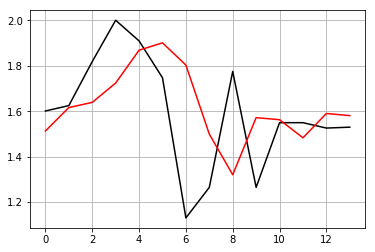

In [29]:
plt.plot(y_test, 'k')
plt.plot(pred, 'r')
plt.grid(True)

In [30]:
for i in range(1, 11):
    mlp_regressor = KerasRegressor(build_fn=network_model, epochs=200, batch_size=10)
    model = mlp_regressor.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=False)
    pred = mlp_regressor.predict(X_test)
    mape = MAPE(y_test, pred)
    errors.append(mape)

Train on 4 samples, validate on 14 samples
Epoch 1/200
4/4 [==============================] - 1s 331ms/step - loss: 1.4166 - acc: 0.0000e+00 - val_loss: 1.9142 - val_acc: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3838 - acc: 0.0000e+00 - val_loss: 1.8675 - val_acc: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1.3509 - acc: 0.0000e+00 - val_loss: 1.8197 - val_acc: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3180 - acc: 0.0000e+00 - val_loss: 1.7709 - val_acc: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2842 - acc: 0.0000e+00 - val_loss: 1.7220 - val_acc: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 1ms/step - loss: 1.2503 - acc: 0.0000e+00 - val_loss: 1.6733 - val_acc: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2166 - acc: 0.0000e+00 - val_loss: 1.6250 - val_acc: 0.0000e

4/4 [==============================] - 0s 1ms/step - loss: 0.1170 - acc: 0.2500 - val_loss: 0.1366 - val_acc: 0.0000e+00
Epoch 62/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1099 - acc: 0.2500 - val_loss: 0.1289 - val_acc: 0.0000e+00
Epoch 63/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1031 - acc: 0.2500 - val_loss: 0.1218 - val_acc: 0.0000e+00
Epoch 64/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0968 - acc: 0.2500 - val_loss: 0.1153 - val_acc: 0.0000e+00
Epoch 65/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0909 - acc: 0.2500 - val_loss: 0.1093 - val_acc: 0.0000e+00
Epoch 66/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0853 - acc: 0.2500 - val_loss: 0.1038 - val_acc: 0.0000e+00
Epoch 67/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0801 - acc: 0.2500 - val_loss: 0.0988 - val_acc: 0.0714
Epoch 68/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0752 

Epoch 124/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0268 - acc: 0.2500 - val_loss: 0.0787 - val_acc: 0.0714
Epoch 125/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0267 - acc: 0.2500 - val_loss: 0.0786 - val_acc: 0.0714
Epoch 126/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0267 - acc: 0.2500 - val_loss: 0.0786 - val_acc: 0.0714
Epoch 127/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0267 - acc: 0.2500 - val_loss: 0.0785 - val_acc: 0.0714
Epoch 128/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0267 - acc: 0.2500 - val_loss: 0.0784 - val_acc: 0.0714
Epoch 129/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0267 - acc: 0.2500 - val_loss: 0.0784 - val_acc: 0.0714
Epoch 130/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0267 - acc: 0.2500 - val_loss: 0.0783 - val_acc: 0.0714
Epoch 131/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0267 - a

Epoch 187/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0266 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 188/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0266 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 189/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0266 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 190/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0266 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 191/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0266 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 192/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0266 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 193/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0266 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 194/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0266 - a

Epoch 47/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7557 - acc: 0.0000e+00 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 48/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7410 - acc: 0.0000e+00 - val_loss: 0.9794 - val_acc: 0.0000e+00
Epoch 49/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7264 - acc: 0.0000e+00 - val_loss: 0.9589 - val_acc: 0.0000e+00
Epoch 50/200
4/4 [==============================] - 0s 1ms/step - loss: 0.7119 - acc: 0.0000e+00 - val_loss: 0.9385 - val_acc: 0.0000e+00
Epoch 51/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6975 - acc: 0.0000e+00 - val_loss: 0.9185 - val_acc: 0.0000e+00
Epoch 52/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6832 - acc: 0.0000e+00 - val_loss: 0.8987 - val_acc: 0.0000e+00
Epoch 53/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6692 - acc: 0.0000e+00 - val_loss: 0.8790 - val_acc: 0.0000e+00
Epoch 54/200
4/4 [================

Epoch 108/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1413 - acc: 0.2500 - val_loss: 0.1763 - val_acc: 0.0000e+00
Epoch 109/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1364 - acc: 0.2500 - val_loss: 0.1705 - val_acc: 0.0000e+00
Epoch 110/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1316 - acc: 0.2500 - val_loss: 0.1649 - val_acc: 0.0000e+00
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1270 - acc: 0.2500 - val_loss: 0.1596 - val_acc: 0.0000e+00
Epoch 112/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1225 - acc: 0.2500 - val_loss: 0.1544 - val_acc: 0.0000e+00
Epoch 113/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1182 - acc: 0.2500 - val_loss: 0.1495 - val_acc: 0.0000e+00
Epoch 114/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1140 - acc: 0.2500 - val_loss: 0.1447 - val_acc: 0.0000e+00
Epoch 115/200
4/4 [==============================] - 0s

Epoch 170/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0272 - acc: 0.2500 - val_loss: 0.0720 - val_acc: 0.0714
Epoch 171/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0270 - acc: 0.2500 - val_loss: 0.0722 - val_acc: 0.0714
Epoch 172/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0268 - acc: 0.2500 - val_loss: 0.0723 - val_acc: 0.0714
Epoch 173/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0267 - acc: 0.2500 - val_loss: 0.0725 - val_acc: 0.0714
Epoch 174/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0265 - acc: 0.2500 - val_loss: 0.0727 - val_acc: 0.0714
Epoch 175/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0264 - acc: 0.2500 - val_loss: 0.0729 - val_acc: 0.0714
Epoch 176/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0262 - acc: 0.2500 - val_loss: 0.0731 - val_acc: 0.0714
Epoch 177/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0261 - a

Epoch 31/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1356 - acc: 0.0000e+00 - val_loss: 1.5495 - val_acc: 0.0000e+00
Epoch 32/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1178 - acc: 0.0000e+00 - val_loss: 1.5239 - val_acc: 0.0000e+00
Epoch 33/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1000 - acc: 0.0000e+00 - val_loss: 1.4985 - val_acc: 0.0000e+00
Epoch 34/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0824 - acc: 0.0000e+00 - val_loss: 1.4733 - val_acc: 0.0000e+00
Epoch 35/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0648 - acc: 0.0000e+00 - val_loss: 1.4483 - val_acc: 0.0000e+00
Epoch 36/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0475 - acc: 0.0000e+00 - val_loss: 1.4234 - val_acc: 0.0000e+00
Epoch 37/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0303 - acc: 0.0000e+00 - val_loss: 1.3986 - val_acc: 0.0000e+00
Epoch 38/200
4/4 [================

Epoch 92/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3148 - acc: 0.2500 - val_loss: 0.3961 - val_acc: 0.0000e+00
Epoch 93/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3053 - acc: 0.2500 - val_loss: 0.3836 - val_acc: 0.0000e+00
Epoch 94/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2959 - acc: 0.2500 - val_loss: 0.3713 - val_acc: 0.0000e+00
Epoch 95/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2868 - acc: 0.2500 - val_loss: 0.3594 - val_acc: 0.0000e+00
Epoch 96/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2778 - acc: 0.2500 - val_loss: 0.3477 - val_acc: 0.0000e+00
Epoch 97/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2689 - acc: 0.2500 - val_loss: 0.3363 - val_acc: 0.0000e+00
Epoch 98/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2603 - acc: 0.2500 - val_loss: 0.3251 - val_acc: 0.0000e+00
Epoch 99/200
4/4 [==============================] - 0s 4ms/ste

Epoch 154/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0347 - acc: 0.2500 - val_loss: 0.0737 - val_acc: 0.0714
Epoch 155/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0339 - acc: 0.2500 - val_loss: 0.0735 - val_acc: 0.0714
Epoch 156/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0331 - acc: 0.2500 - val_loss: 0.0733 - val_acc: 0.0714
Epoch 157/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0324 - acc: 0.2500 - val_loss: 0.0732 - val_acc: 0.0714
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0318 - acc: 0.2500 - val_loss: 0.0731 - val_acc: 0.0714
Epoch 159/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0312 - acc: 0.2500 - val_loss: 0.0731 - val_acc: 0.0714
Epoch 160/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0306 - acc: 0.2500 - val_loss: 0.0731 - val_acc: 0.0714
Epoch 161/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0301 - a

Epoch 16/200
4/4 [==============================] - 0s 2ms/step - loss: 1.5473 - acc: 0.0000e+00 - val_loss: 2.1723 - val_acc: 0.0000e+00
Epoch 17/200
4/4 [==============================] - 0s 2ms/step - loss: 1.5269 - acc: 0.0000e+00 - val_loss: 2.1424 - val_acc: 0.0000e+00
Epoch 18/200
4/4 [==============================] - 0s 1ms/step - loss: 1.5070 - acc: 0.0000e+00 - val_loss: 2.1134 - val_acc: 0.0000e+00
Epoch 19/200
4/4 [==============================] - 0s 2ms/step - loss: 1.4875 - acc: 0.0000e+00 - val_loss: 2.0848 - val_acc: 0.0000e+00
Epoch 20/200
4/4 [==============================] - 0s 2ms/step - loss: 1.4683 - acc: 0.0000e+00 - val_loss: 2.0566 - val_acc: 0.0000e+00
Epoch 21/200
4/4 [==============================] - 0s 2ms/step - loss: 1.4495 - acc: 0.0000e+00 - val_loss: 2.0287 - val_acc: 0.0000e+00
Epoch 22/200
4/4 [==============================] - 0s 1ms/step - loss: 1.4309 - acc: 0.0000e+00 - val_loss: 2.0011 - val_acc: 0.0000e+00
Epoch 23/200
4/4 [================

Epoch 76/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6049 - acc: 0.2500 - val_loss: 0.8053 - val_acc: 0.0000e+00
Epoch 77/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5915 - acc: 0.2500 - val_loss: 0.7864 - val_acc: 0.0000e+00
Epoch 78/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5781 - acc: 0.2500 - val_loss: 0.7676 - val_acc: 0.0000e+00
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5649 - acc: 0.2500 - val_loss: 0.7491 - val_acc: 0.0000e+00
Epoch 80/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5518 - acc: 0.2500 - val_loss: 0.7307 - val_acc: 0.0000e+00
Epoch 81/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5388 - acc: 0.2500 - val_loss: 0.7125 - val_acc: 0.0000e+00
Epoch 82/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5259 - acc: 0.2500 - val_loss: 0.6945 - val_acc: 0.0000e+00
Epoch 83/200
4/4 [==============================] - 0s 3ms/ste

Epoch 137/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0750 - acc: 0.2500 - val_loss: 0.1048 - val_acc: 0.0000e+00
Epoch 138/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0719 - acc: 0.2500 - val_loss: 0.1016 - val_acc: 0.0000e+00
Epoch 139/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0690 - acc: 0.2500 - val_loss: 0.0985 - val_acc: 0.0000e+00
Epoch 140/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0661 - acc: 0.2500 - val_loss: 0.0957 - val_acc: 0.0000e+00
Epoch 141/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0634 - acc: 0.2500 - val_loss: 0.0931 - val_acc: 0.0714
Epoch 142/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0609 - acc: 0.2500 - val_loss: 0.0906 - val_acc: 0.0714
Epoch 143/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0585 - acc: 0.2500 - val_loss: 0.0884 - val_acc: 0.0714
Epoch 144/200
4/4 [==============================] - 0s 2ms/step - 

Epoch 200/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0252 - acc: 0.2500 - val_loss: 0.0755 - val_acc: 0.0714
Train on 4 samples, validate on 14 samples
Epoch 1/200
4/4 [==============================] - 2s 376ms/step - loss: 1.6735 - acc: 0.0000e+00 - val_loss: 2.3136 - val_acc: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 1.6301 - acc: 0.0000e+00 - val_loss: 2.2586 - val_acc: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1.5930 - acc: 0.0000e+00 - val_loss: 2.1955 - val_acc: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.5504 - acc: 0.0000e+00 - val_loss: 2.1334 - val_acc: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1.5085 - acc: 0.0000e+00 - val_loss: 2.0725 - val_acc: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1.4672 - acc: 0.0000e+00 - val_loss: 2.0129 - val_acc: 0.0000e+00
Ep

Epoch 60/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2581 - acc: 0.2500 - val_loss: 0.3143 - val_acc: 0.0000e+00
Epoch 61/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2471 - acc: 0.2500 - val_loss: 0.3002 - val_acc: 0.0000e+00
Epoch 62/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2366 - acc: 0.2500 - val_loss: 0.2867 - val_acc: 0.0000e+00
Epoch 63/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2264 - acc: 0.2500 - val_loss: 0.2737 - val_acc: 0.0000e+00
Epoch 64/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2166 - acc: 0.2500 - val_loss: 0.2612 - val_acc: 0.0000e+00
Epoch 65/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2072 - acc: 0.2500 - val_loss: 0.2492 - val_acc: 0.0000e+00
Epoch 66/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1980 - acc: 0.2500 - val_loss: 0.2376 - val_acc: 0.0000e+00
Epoch 67/200
4/4 [==============================] - 0s 3ms/ste

4/4 [==============================] - 0s 1ms/step - loss: 0.0278 - acc: 0.2500 - val_loss: 0.0694 - val_acc: 0.0714
Epoch 123/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0276 - acc: 0.2500 - val_loss: 0.0697 - val_acc: 0.0714
Epoch 124/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0275 - acc: 0.2500 - val_loss: 0.0700 - val_acc: 0.0714
Epoch 125/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0273 - acc: 0.2500 - val_loss: 0.0703 - val_acc: 0.0714
Epoch 126/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0272 - acc: 0.2500 - val_loss: 0.0707 - val_acc: 0.0714
Epoch 127/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0270 - acc: 0.2500 - val_loss: 0.0710 - val_acc: 0.0714
Epoch 128/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0269 - acc: 0.2500 - val_loss: 0.0713 - val_acc: 0.0714
Epoch 129/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0268 - acc: 0.2500 - v

Epoch 185/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0766 - val_acc: 0.0714
Epoch 186/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0766 - val_acc: 0.0714
Epoch 187/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0766 - val_acc: 0.0714
Epoch 188/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0766 - val_acc: 0.0714
Epoch 189/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0766 - val_acc: 0.0714
Epoch 190/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 191/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 192/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0263 - a

Epoch 46/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5284 - acc: 0.2500 - val_loss: 0.6692 - val_acc: 0.0000e+00
Epoch 47/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5137 - acc: 0.2500 - val_loss: 0.6492 - val_acc: 0.0000e+00
Epoch 48/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4992 - acc: 0.2500 - val_loss: 0.6295 - val_acc: 0.0000e+00
Epoch 49/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4850 - acc: 0.2500 - val_loss: 0.6102 - val_acc: 0.0000e+00
Epoch 50/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4709 - acc: 0.2500 - val_loss: 0.5912 - val_acc: 0.0000e+00
Epoch 51/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4571 - acc: 0.2500 - val_loss: 0.5726 - val_acc: 0.0000e+00
Epoch 52/200
4/4 [==============================] - 0s 2ms/step - loss: 0.4435 - acc: 0.2500 - val_loss: 0.5543 - val_acc: 0.0000e+00
Epoch 53/200
4/4 [==============================] - 0s 2ms/ste

Epoch 108/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0487 - acc: 0.2500 - val_loss: 0.0744 - val_acc: 0.0714
Epoch 109/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0470 - acc: 0.2500 - val_loss: 0.0732 - val_acc: 0.0714
Epoch 110/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0454 - acc: 0.2500 - val_loss: 0.0722 - val_acc: 0.0714
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0439 - acc: 0.2500 - val_loss: 0.0713 - val_acc: 0.0714
Epoch 112/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0425 - acc: 0.2500 - val_loss: 0.0705 - val_acc: 0.0714
Epoch 113/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0412 - acc: 0.2500 - val_loss: 0.0698 - val_acc: 0.0714
Epoch 114/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0399 - acc: 0.2500 - val_loss: 0.0692 - val_acc: 0.0714
Epoch 115/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0388 - a

Epoch 171/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 172/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0765 - val_acc: 0.0714
Epoch 173/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0766 - val_acc: 0.0714
Epoch 174/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0766 - val_acc: 0.0714
Epoch 175/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0767 - val_acc: 0.0714
Epoch 176/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0767 - val_acc: 0.0714
Epoch 177/200
4/4 [==============================] - 0s 991us/step - loss: 0.0263 - acc: 0.2500 - val_loss: 0.0767 - val_acc: 0.0714
Epoch 178/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0263 -

Epoch 32/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0799 - acc: 0.0000e+00 - val_loss: 1.4909 - val_acc: 0.0000e+00
Epoch 33/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0579 - acc: 0.0000e+00 - val_loss: 1.4586 - val_acc: 0.0000e+00
Epoch 34/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0361 - acc: 0.0000e+00 - val_loss: 1.4269 - val_acc: 0.0000e+00
Epoch 35/200
4/4 [==============================] - 0s 1ms/step - loss: 1.0147 - acc: 0.0000e+00 - val_loss: 1.3959 - val_acc: 0.0000e+00
Epoch 36/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9940 - acc: 0.0000e+00 - val_loss: 1.3655 - val_acc: 0.0000e+00
Epoch 37/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9742 - acc: 0.0000e+00 - val_loss: 1.3360 - val_acc: 0.0000e+00
Epoch 38/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9547 - acc: 0.0000e+00 - val_loss: 1.3068 - val_acc: 0.0000e+00
Epoch 39/200
4/4 [================

Epoch 93/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2235 - acc: 0.2500 - val_loss: 0.2825 - val_acc: 0.0000e+00
Epoch 94/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2159 - acc: 0.2500 - val_loss: 0.2726 - val_acc: 0.0000e+00
Epoch 95/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2086 - acc: 0.2500 - val_loss: 0.2631 - val_acc: 0.0000e+00
Epoch 96/200
4/4 [==============================] - 0s 1ms/step - loss: 0.2014 - acc: 0.2500 - val_loss: 0.2538 - val_acc: 0.0000e+00
Epoch 97/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1944 - acc: 0.2500 - val_loss: 0.2448 - val_acc: 0.0000e+00
Epoch 98/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1875 - acc: 0.2500 - val_loss: 0.2361 - val_acc: 0.0000e+00
Epoch 99/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1809 - acc: 0.2500 - val_loss: 0.2277 - val_acc: 0.0000e+00
Epoch 100/200
4/4 [==============================] - 0s 3ms/st

Epoch 155/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0317 - acc: 0.2500 - val_loss: 0.0651 - val_acc: 0.0714
Epoch 156/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0313 - acc: 0.2500 - val_loss: 0.0650 - val_acc: 0.0714
Epoch 157/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0310 - acc: 0.2500 - val_loss: 0.0650 - val_acc: 0.0714
Epoch 158/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0306 - acc: 0.2500 - val_loss: 0.0650 - val_acc: 0.0714
Epoch 159/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0303 - acc: 0.2500 - val_loss: 0.0651 - val_acc: 0.0714
Epoch 160/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0300 - acc: 0.2500 - val_loss: 0.0651 - val_acc: 0.0714
Epoch 161/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0298 - acc: 0.2500 - val_loss: 0.0652 - val_acc: 0.0714
Epoch 162/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0295 - a

Epoch 17/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3399 - acc: 0.0000e+00 - val_loss: 1.8608 - val_acc: 0.0000e+00
Epoch 18/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3154 - acc: 0.0000e+00 - val_loss: 1.8251 - val_acc: 0.0000e+00
Epoch 19/200
4/4 [==============================] - 0s 4ms/step - loss: 1.2915 - acc: 0.0000e+00 - val_loss: 1.7907 - val_acc: 0.0000e+00
Epoch 20/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2689 - acc: 0.0000e+00 - val_loss: 1.7567 - val_acc: 0.0000e+00
Epoch 21/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2473 - acc: 0.0000e+00 - val_loss: 1.7237 - val_acc: 0.0000e+00
Epoch 22/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2268 - acc: 0.0000e+00 - val_loss: 1.6920 - val_acc: 0.0000e+00
Epoch 23/200
4/4 [==============================] - 0s 3ms/step - loss: 1.2069 - acc: 0.0000e+00 - val_loss: 1.6620 - val_acc: 0.0000e+00
Epoch 24/200
4/4 [================

Epoch 77/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3904 - acc: 0.2500 - val_loss: 0.5040 - val_acc: 0.0000e+00
Epoch 78/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3793 - acc: 0.2500 - val_loss: 0.4889 - val_acc: 0.0000e+00
Epoch 79/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3684 - acc: 0.2500 - val_loss: 0.4741 - val_acc: 0.0000e+00
Epoch 80/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3576 - acc: 0.2500 - val_loss: 0.4596 - val_acc: 0.0000e+00
Epoch 81/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3471 - acc: 0.2500 - val_loss: 0.4453 - val_acc: 0.0000e+00
Epoch 82/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3367 - acc: 0.2500 - val_loss: 0.4313 - val_acc: 0.0000e+00
Epoch 83/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3266 - acc: 0.2500 - val_loss: 0.4177 - val_acc: 0.0000e+00
Epoch 84/200
4/4 [==============================] - 0s 2ms/ste

Epoch 139/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0445 - acc: 0.2500 - val_loss: 0.0732 - val_acc: 0.0714
Epoch 140/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0433 - acc: 0.2500 - val_loss: 0.0723 - val_acc: 0.0714
Epoch 141/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0421 - acc: 0.2500 - val_loss: 0.0715 - val_acc: 0.0714
Epoch 142/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0410 - acc: 0.2500 - val_loss: 0.0707 - val_acc: 0.0714
Epoch 143/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0400 - acc: 0.2500 - val_loss: 0.0700 - val_acc: 0.0714
Epoch 144/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0390 - acc: 0.2500 - val_loss: 0.0694 - val_acc: 0.0714
Epoch 145/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0381 - acc: 0.2500 - val_loss: 0.0688 - val_acc: 0.0714
Epoch 146/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0372 - a

Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.6694 - acc: 0.0000e+00 - val_loss: 2.3121 - val_acc: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 1.6402 - acc: 0.0000e+00 - val_loss: 2.2625 - val_acc: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 1.6064 - acc: 0.0000e+00 - val_loss: 2.2134 - val_acc: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 1.5730 - acc: 0.0000e+00 - val_loss: 2.1647 - val_acc: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1.5399 - acc: 0.0000e+00 - val_loss: 2.1167 - val_acc: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 1.5071 - acc: 0.0000e+00 - val_loss: 2.0691 - val_acc: 0.0000e+00
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 1.4747 - acc: 0.0000e+00 - val_loss: 2.0221 - val_acc: 0.0000e+00
Epoch 9/200
4/4 [========================

Epoch 62/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3903 - acc: 0.2500 - val_loss: 0.4801 - val_acc: 0.0000e+00
Epoch 63/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3787 - acc: 0.2500 - val_loss: 0.4647 - val_acc: 0.0000e+00
Epoch 64/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3673 - acc: 0.2500 - val_loss: 0.4496 - val_acc: 0.0000e+00
Epoch 65/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3560 - acc: 0.2500 - val_loss: 0.4348 - val_acc: 0.0000e+00
Epoch 66/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3449 - acc: 0.2500 - val_loss: 0.4203 - val_acc: 0.0000e+00
Epoch 67/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3341 - acc: 0.2500 - val_loss: 0.4061 - val_acc: 0.0000e+00
Epoch 68/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3234 - acc: 0.2500 - val_loss: 0.3922 - val_acc: 0.0000e+00
Epoch 69/200
4/4 [==============================] - 0s 3ms/ste

Epoch 124/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0367 - acc: 0.2500 - val_loss: 0.0700 - val_acc: 0.0714
Epoch 125/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0358 - acc: 0.2500 - val_loss: 0.0698 - val_acc: 0.0714
Epoch 126/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0349 - acc: 0.2500 - val_loss: 0.0696 - val_acc: 0.0714
Epoch 127/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0340 - acc: 0.2500 - val_loss: 0.0695 - val_acc: 0.0714
Epoch 128/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0332 - acc: 0.2500 - val_loss: 0.0695 - val_acc: 0.0714
Epoch 129/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0325 - acc: 0.2500 - val_loss: 0.0695 - val_acc: 0.0714
Epoch 130/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0319 - acc: 0.2500 - val_loss: 0.0695 - val_acc: 0.0714
Epoch 131/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0312 - a

Epoch 187/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0254 - acc: 0.2500 - val_loss: 0.0807 - val_acc: 0.0714
Epoch 188/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0254 - acc: 0.2500 - val_loss: 0.0807 - val_acc: 0.0714
Epoch 189/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0254 - acc: 0.2500 - val_loss: 0.0807 - val_acc: 0.0714
Epoch 190/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0254 - acc: 0.2500 - val_loss: 0.0807 - val_acc: 0.0714
Epoch 191/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0254 - acc: 0.2500 - val_loss: 0.0807 - val_acc: 0.0714
Epoch 192/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0254 - acc: 0.2500 - val_loss: 0.0807 - val_acc: 0.0714
Epoch 193/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0254 - acc: 0.2500 - val_loss: 0.0807 - val_acc: 0.0714
Epoch 194/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0254 - a

Epoch 47/200
4/4 [==============================] - 0s 1ms/step - loss: 0.5597 - acc: 0.2500 - val_loss: 0.7254 - val_acc: 0.0000e+00
Epoch 48/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5423 - acc: 0.2500 - val_loss: 0.7013 - val_acc: 0.0000e+00
Epoch 49/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5252 - acc: 0.2500 - val_loss: 0.6777 - val_acc: 0.0000e+00
Epoch 50/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5084 - acc: 0.2500 - val_loss: 0.6545 - val_acc: 0.0000e+00
Epoch 51/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4919 - acc: 0.2500 - val_loss: 0.6317 - val_acc: 0.0000e+00
Epoch 52/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4756 - acc: 0.2500 - val_loss: 0.6095 - val_acc: 0.0000e+00
Epoch 53/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4597 - acc: 0.2500 - val_loss: 0.5877 - val_acc: 0.0000e+00
Epoch 54/200
4/4 [==============================] - 0s 3ms/ste

Epoch 109/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0436 - acc: 0.2500 - val_loss: 0.0710 - val_acc: 0.0714
Epoch 110/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0421 - acc: 0.2500 - val_loss: 0.0701 - val_acc: 0.0714
Epoch 111/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0407 - acc: 0.2500 - val_loss: 0.0693 - val_acc: 0.0714
Epoch 112/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0394 - acc: 0.2500 - val_loss: 0.0687 - val_acc: 0.0714
Epoch 113/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0382 - acc: 0.2500 - val_loss: 0.0682 - val_acc: 0.0714
Epoch 114/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0371 - acc: 0.2500 - val_loss: 0.0678 - val_acc: 0.0714
Epoch 115/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0361 - acc: 0.2500 - val_loss: 0.0674 - val_acc: 0.0714
Epoch 116/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0351 - a

Epoch 172/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0264 - acc: 0.2500 - val_loss: 0.0763 - val_acc: 0.0714
Epoch 173/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0264 - acc: 0.2500 - val_loss: 0.0763 - val_acc: 0.0714
Epoch 174/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0264 - acc: 0.2500 - val_loss: 0.0763 - val_acc: 0.0714
Epoch 175/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0264 - acc: 0.2500 - val_loss: 0.0763 - val_acc: 0.0714
Epoch 176/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0264 - acc: 0.2500 - val_loss: 0.0763 - val_acc: 0.0714
Epoch 177/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0264 - acc: 0.2500 - val_loss: 0.0763 - val_acc: 0.0714
Epoch 178/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0264 - acc: 0.2500 - val_loss: 0.0763 - val_acc: 0.0714
Epoch 179/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0264 - a

In [31]:
print(np.mean(errors))

43.16233774999999


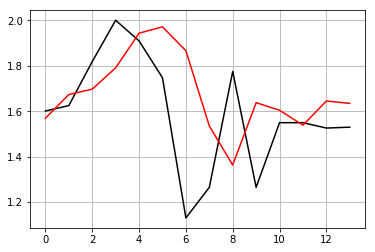

In [32]:
plt.plot(y_test, 'k')
plt.plot(pred, 'r')
plt.grid(True)